In [2]:
install.packages("TSA")
install.packages("TSA")

package 'TSA' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\almac\AppData\Local\Temp\Rtmpu0mz6u\downloaded_packages
package 'TSA' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\almac\AppData\Local\Temp\Rtmpu0mz6u\downloaded_packages


[1] 1500    1

[1] 1869    1

ERROR while rich displaying an object: Error in if (many_rows) {: argumento tiene longitud cero

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.ts(obj)
9. repr_ts_

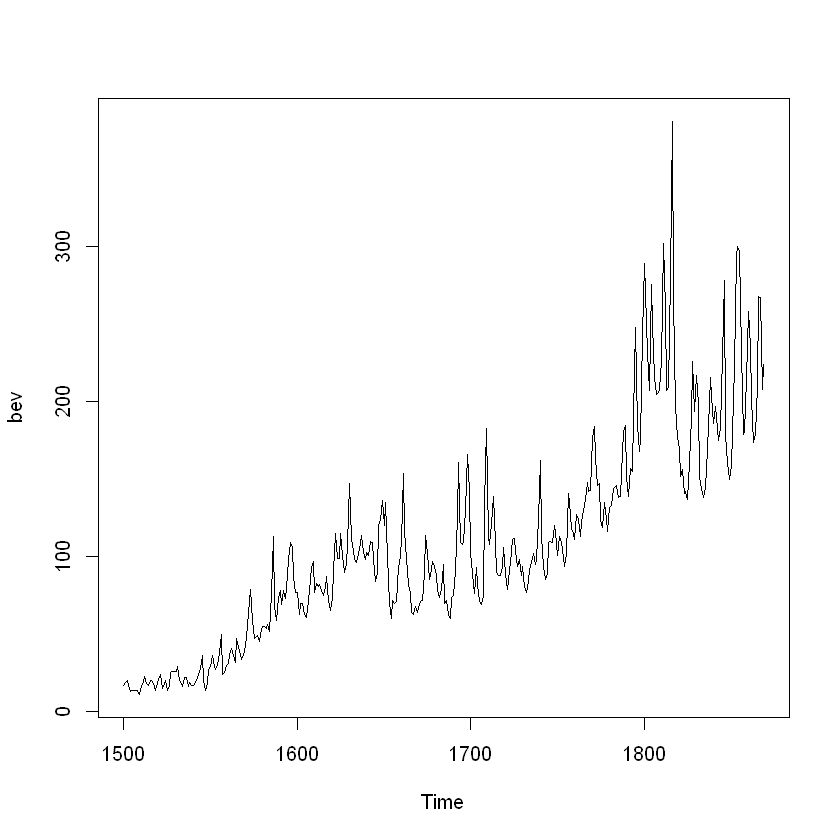

In [4]:
library("TSA")
library("tseries")

data(bev)
#descriptiva
start(bev)
end(bev)
time(bev)
plot(bev)


## Clasificación

## Media

In [5]:
ale<-lm(bev~time(bev))
summary(ale)


Call:
lm(formula = bev ~ time(bev))

Residuals:
    Min      1Q  Median      3Q     Max 
-56.850 -22.737  -2.556  15.325 201.219 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -813.21332   27.24345  -29.85   <2e-16 ***
time(bev)      0.54680    0.01614   33.88   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 33.16 on 368 degrees of freedom
Multiple R-squared:  0.7572,	Adjusted R-squared:  0.7565 
F-statistic:  1148 on 1 and 368 DF,  p-value: < 2.2e-16


Regresión significativa

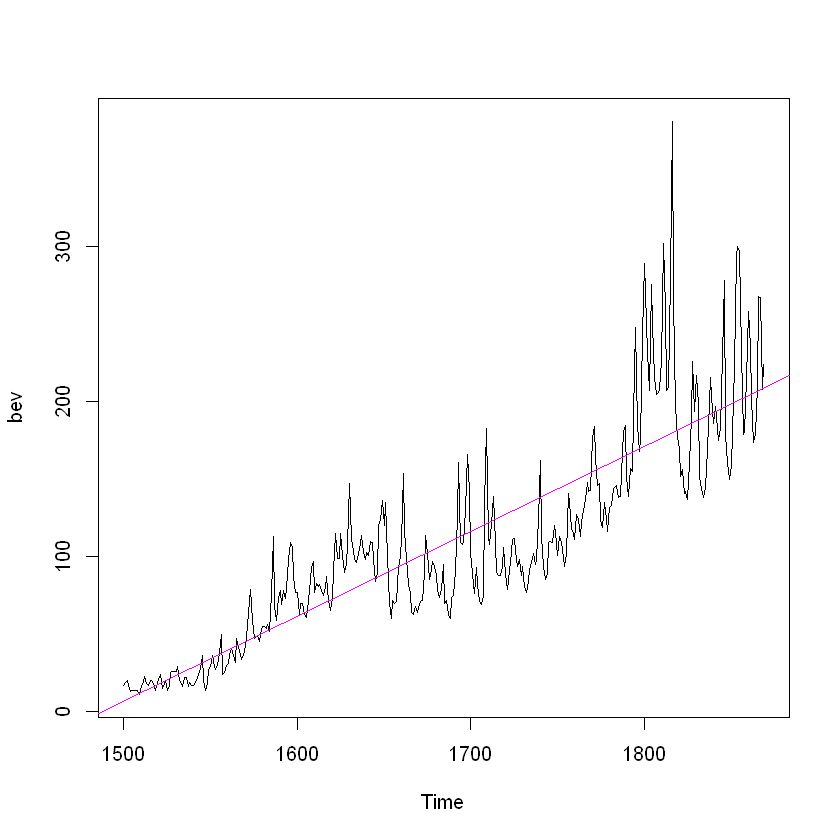

In [7]:
plot(bev)
abline(ale, col="magenta")

# Modelo de tendencia log

In [8]:
x.<-log(time(bev))
tlog<-lm(bev~x.)
summary(tlog)


Call:
lm(formula = bev ~ x.)

Residuals:
    Min      1Q  Median      3Q     Max 
-58.177 -23.398  -1.953  14.632 202.474 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -6690.5      203.5  -32.87   <2e-16 ***
x.             915.3       27.4   33.41   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 33.51 on 368 degrees of freedom
Multiple R-squared:  0.752,	Adjusted R-squared:  0.7513 
F-statistic:  1116 on 1 and 368 DF,  p-value: < 2.2e-16


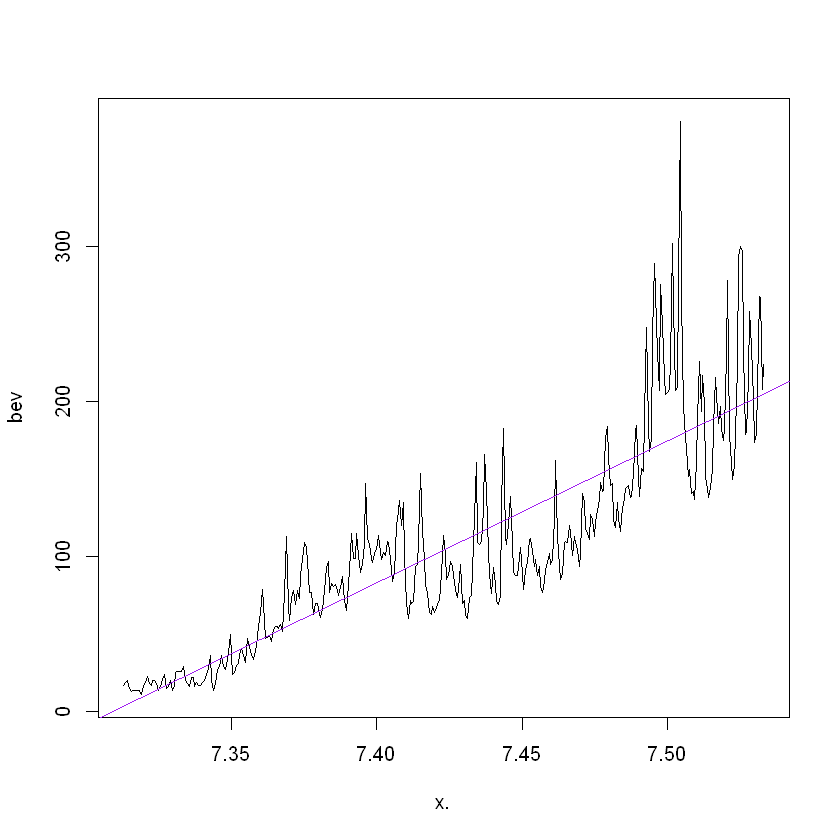

In [9]:
plot(x., bev,type="l")
plot(bev)
abline(ale, col="magenta")

abline(tlog, col="purple")

(Intercept) 
  -6690.464

ERROR while rich displaying an object: Error in if (many_rows) {: argumento tiene longitud cero

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.ts(obj)
9. repr_ts_

ERROR: Error: $ operator is invalid for atomic vectors


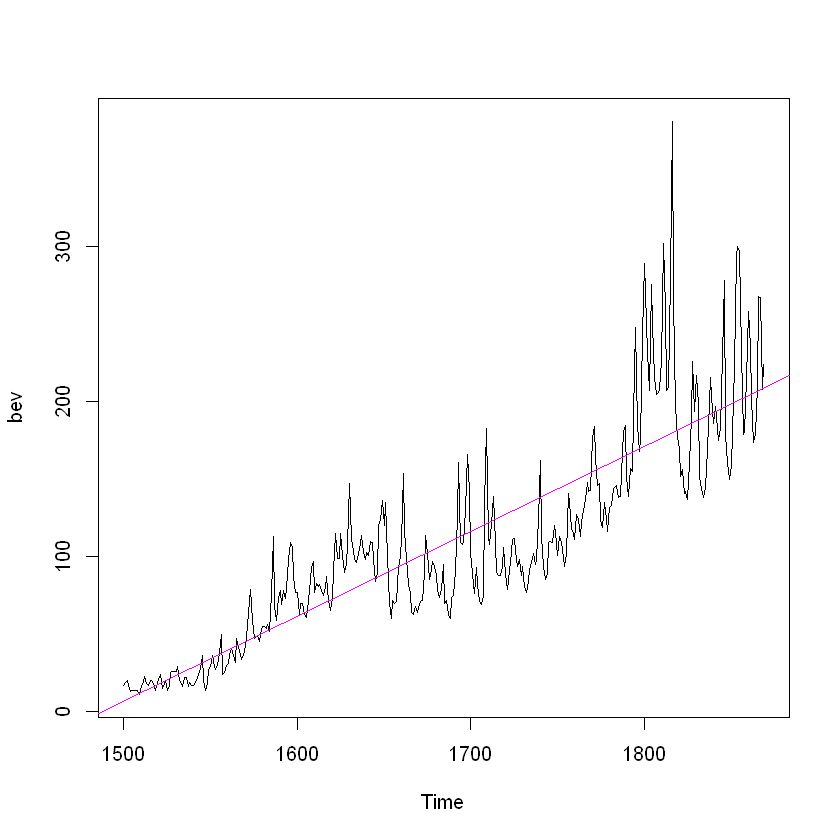

In [12]:
plot(bev)
tlog$coefficients[1]
tenl<-tlog$coefficients[1]+tlog$coefficients[2]*x.
tenl

abline(ale, col="magenta")
abline(tenl, col="blue")

El modelo muestra tendencia creciente

## Varianza

In [13]:
adf.test(bev, alternative="stationary")

Warning message in adf.test(bev, alternative = "stationary"):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  bev
Dickey-Fuller = -4.0942, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary


Rechazamos Ho, estacionaria en varianza

Clasificación de la serie como: NO ESTACIONARIA

**Corrección**

In [14]:
c1<-diff(bev) #diferenciando serie original

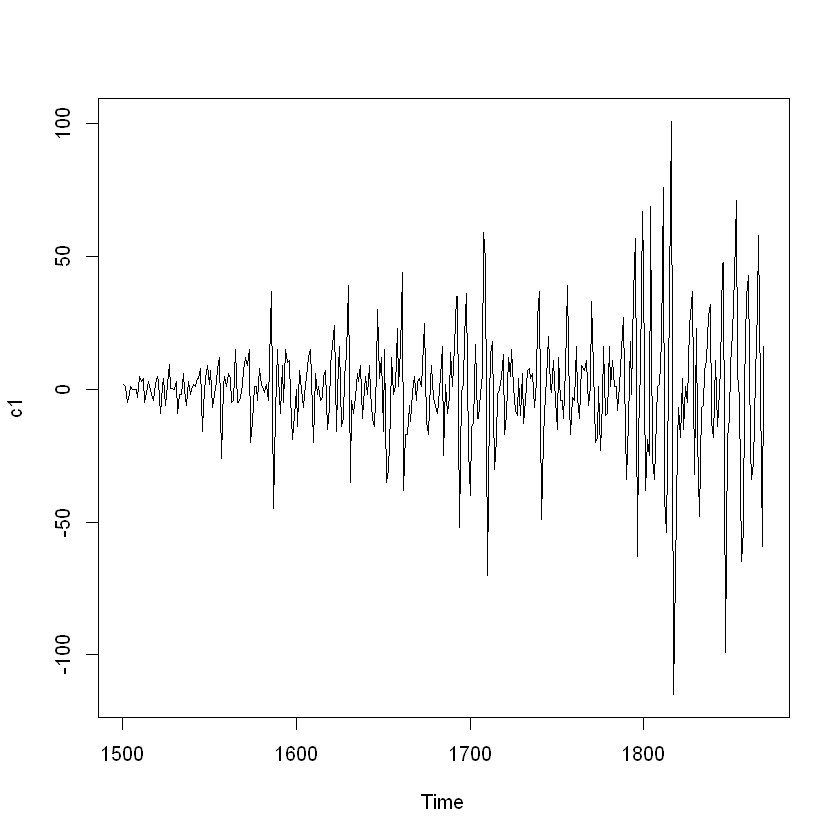

In [15]:
plot(c1)

# Tendencia

In [16]:
summary(lm(c1~time(c1)))


Call:
lm(formula = c1 ~ time(c1))

Residuals:
     Min       1Q   Median       3Q      Max 
-115.708   -9.390    0.332    8.255  100.293 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) -1.318719  18.725665  -0.070    0.944
time(c1)     0.001116   0.011091   0.101    0.920

Residual standard error: 22.69 on 367 degrees of freedom
Multiple R-squared:  2.756e-05,	Adjusted R-squared:  -0.002697 
F-statistic: 0.01012 on 1 and 367 DF,  p-value: 0.9199


No tiene tendencia lineal, entonces es estacionaria.

# Varianza

In [18]:
adf.test(c1, alternative="stationary")

Warning message in adf.test(c1, alternative = "stationary"):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  c1
Dickey-Fuller = -10.043, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary


La serie es estacionaria en varianza

Clasificación para C1: Estacionaria

# Modelado

In [19]:
ar(c1)
AIC(arima(correc2, order=c(16,0,0), method="ML"))


Call:
ar(x = c1)

Coefficients:
      1        2        3        4        5        6        7        8  
-0.0257  -0.4214  -0.3146  -0.2784  -0.1454  -0.2565  -0.1067  -0.2065  
      9       10       11       12       13       14       15       16  
-0.1787  -0.1483  -0.0825   0.0025  -0.1093   0.0611   0.0200   0.1523  

Order selected 16  sigma^2 estimated as  383.1

In [22]:
#MA
aic0<-Inf # le das un numero muy grande
for (i in 1:20)
{
  aic1<-AIC(arima(c1, order = c(0,0,i), method ="ML" ))
  if(aic1<aic0)
  {
    aic0<-aic1
    MA.mejor<-i
  }
}
aic0 #AIC del mejor MA: 3247.57
MA.mejor# el orden del mejor MA 20
AIC(arima(c1, order=c(0,0,20), method="ML"))

[1] 3247.571

[1] 20

# Ruido blanco

In [23]:
#ARMA
arma.aic<-Inf
for(j in 1:15)
{
  for (i in 1:15)
  {
    aux<-AIC(arima(c1, order = c(j,0,i), method ="ML" ))
    if(aux<arma.aic)
    {
      arma.aic<-aux
      ARMA.mejor<-c(j,i)
    }
  }
}
arma.aic
ARMA.mejor 
AIC(arima(c1, order=c(5,0,17), method="ML"))

Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning messa

ERROR: Error in optim(init[mask], armafn, method = optim.method, hessian = TRUE, : non-finite finite-difference value [11]


# Ruido blanco de los residuales

In [25]:
res.517<-residuals(arima(c1, order=c(5,0,17), method="ML"))

## Media

In [26]:
mean(res.517)

[1] -0.2182792

## Varianza

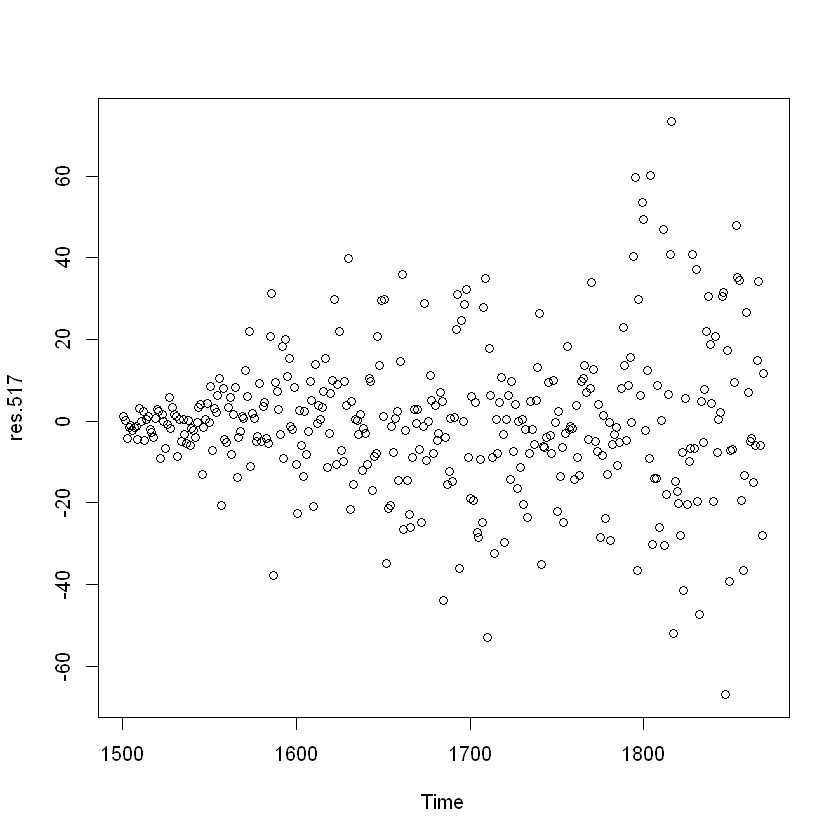

In [27]:
plot(res.517, type="p")

## incorrelación

In [ ]:
Tarea: 

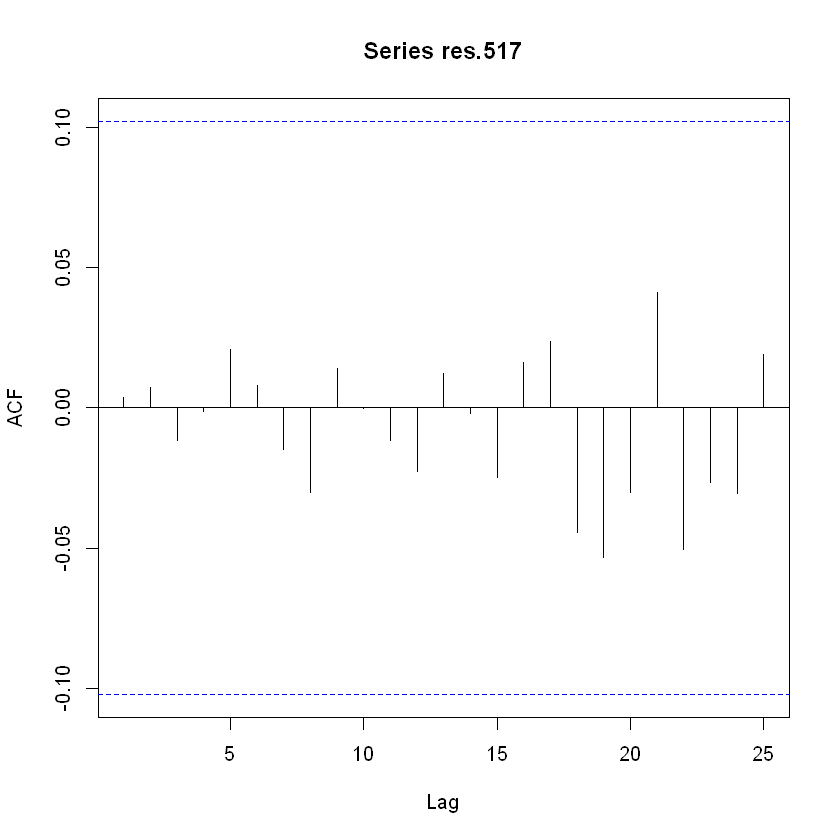

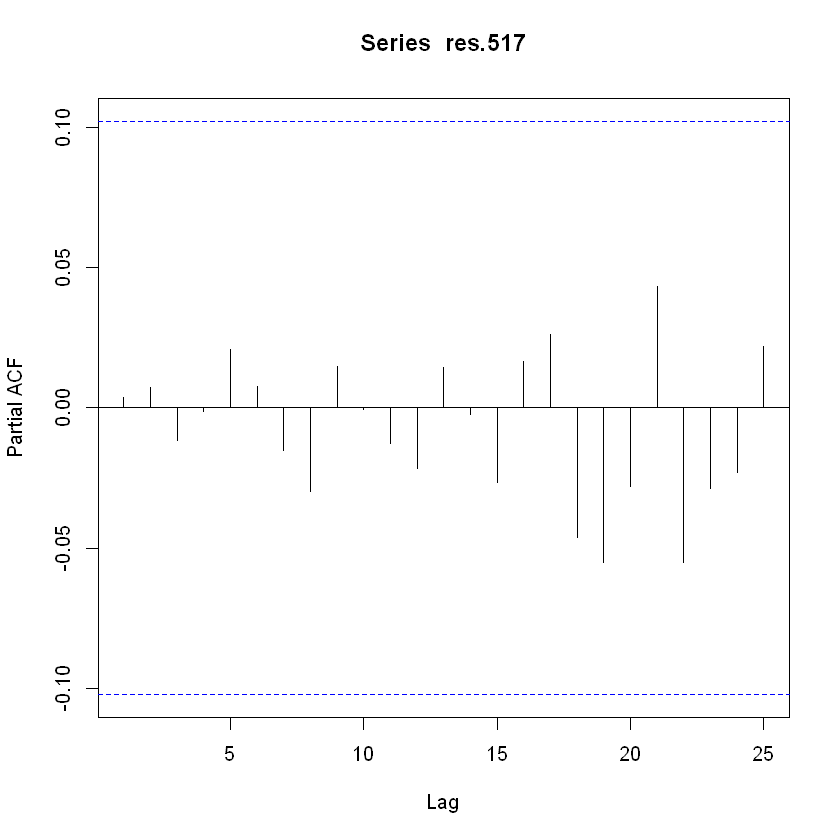

In [28]:
acf(res.517)# incorrelación, porque ninguno de los dos graficos se pasa de los límites
pacf(res.517) 

## Predicciones

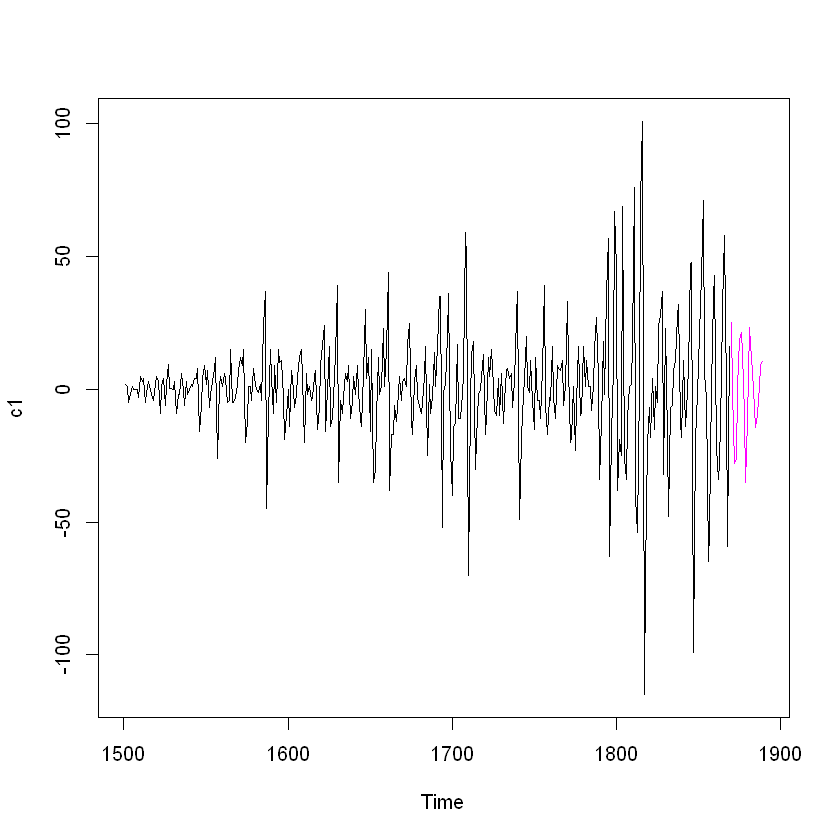

In [29]:
p<-predict(arima(c1, order=c(5, 0,17), method="ML"), n.ahead=20)$pred
plot(c1, xlim=c(1500, 1890))
lines(p, col="magenta")

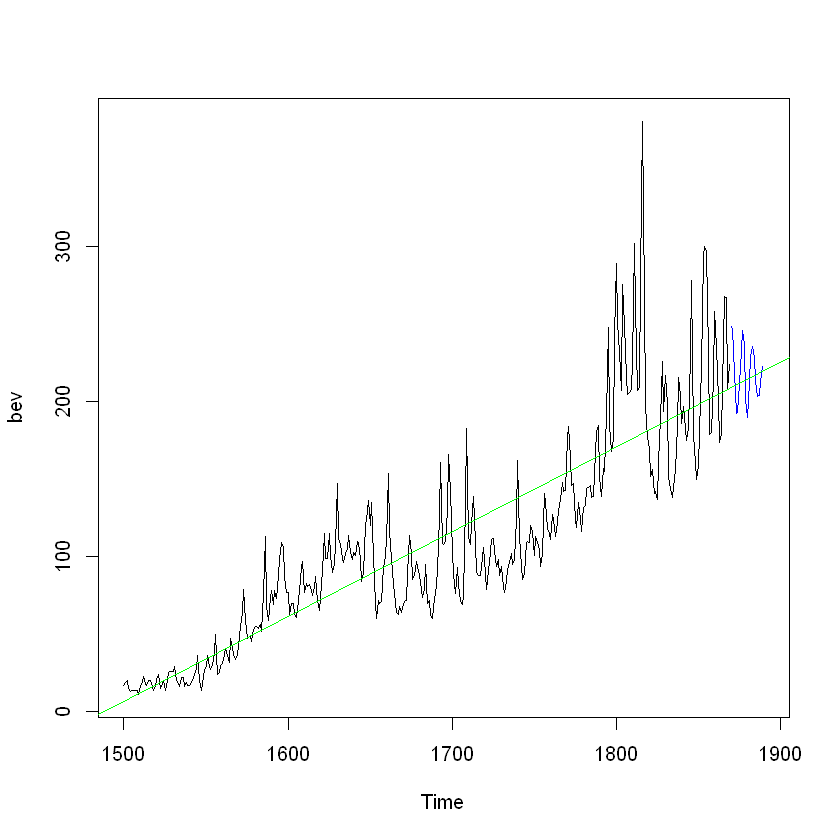

In [32]:
p5<-predict(arima(bev, order=c(5, 1,17), method="ML"), n.ahead=20)$pred
plot(bev, xlim=c(1500, 1890))
lines(p5, col="blue")
abline(ale, col="green", lty=2)